# Automatic Detection of Mosquito Breeding Grounds

### Divide MBG videos into frame by frame

In [1]:
# import cv2
# import os
# import xml.etree.ElementTree as ET

# def read_annotations(xml_file):
#     tree = ET.parse(xml_file)
#     root = tree.getroot()
#     annotations = {}

#     for track in root.findall(".//track"):
#         label = track.attrib["label"]

#         for box in track.findall(".//box"):
#             frame_number = int(box.attrib["frame"])
#             xmin = int(float(box.attrib["xtl"]))
#             ymin = int(float(box.attrib["ytl"]))
#             xmax = int(float(box.attrib["xbr"]))
#             ymax = int(float(box.attrib["ybr"]))

#             if frame_number not in annotations:
#                 annotations[frame_number] = []

#             annotations[frame_number].append({
#                 'label': label,
#                 'bbox': (xmin, ymin, xmax, ymax)
#             })

#     return annotations

# def convert_to_yolo_format(class_id, image_width, image_height, bbox):
#     x_center = (bbox[0] + bbox[2]) / 2 / image_width
#     y_center = (bbox[1] + bbox[3]) / 2 / image_height
#     width = (bbox[2] - bbox[0]) / image_width
#     height = (bbox[3] - bbox[1]) / image_height

#     return f"{class_id} {x_center} {y_center} {width} {height}"

# def split_video(video_path, xml_file, output_image_directory, output_annotation_directory, frame_rate=1):
#     cap = cv2.VideoCapture(video_path)
#     annotations = read_annotations(xml_file)

#     frame_number = 0
#     while True:
#         ret, frame = cap.read()
#         if not ret:
#             break

#         if frame_number in annotations:
#             image_height, image_width, _ = frame.shape

#             # Save the frame as an image
#             output_image_file = os.path.join(output_image_directory, f"frame_{frame_number:04d}.jpg")
#             cv2.imwrite(output_image_file, frame)

#             # Save YOLO format annotation to file
#             annotation_file_path = os.path.join(output_annotation_directory, f"frame_{frame_number:04d}.txt")
#             with open(annotation_file_path, 'w') as yolo_file:
#                 for annotation in annotations[frame_number]:
#                     xmin, ymin, xmax, ymax = annotation['bbox']
#                     label = annotation['label']

#                     # Get class_id from the class_ids dictionary
#                     class_id = class_ids.get(label)
#                     if class_id is not None:
#                         yolo_format = convert_to_yolo_format(class_id, image_width, image_height, (xmin, ymin, xmax, ymax))
#                         yolo_file.write(f"{yolo_format}\n")

#         # Create the output directories if they don't exist
#         os.makedirs(output_image_directory, exist_ok=True)
#         os.makedirs(output_annotation_directory, exist_ok=True)

#         # Save the frame if it's within the desired frame rate
#         if frame_number % int(cap.get(cv2.CAP_PROP_FPS) / frame_rate) == 0:
#             frame_number += 1
#             continue

#         frame_number += 1

#     cap.release()

# if __name__ == "__main__":
#     video_directory = "C:/Users/user/Downloads/FYP/fypfiles/mbgdataset/flightavi"
#     annotation_directory = "C:/Users/user/Downloads/FYP/fypfiles/mbgdataset/flightann"
#     output_image_directory = "C:/Users/user/Downloads/projects/MBGprocess/imageframes"
#     output_annotation_directory = "C:/Users/user/Downloads/projects/MBGprocess/labelframes"
#     frame_rate = 1

#     class_ids = {"tire": 0, "bottle": 1, "bucket": 2, "watertank": 3, "pool": 4, "puddle": 5}

#     video_files = [f for f in os.listdir(video_directory) if f.endswith(".avi")]

#     for video_file in video_files:
#         video_path = os.path.join(video_directory, video_file)
#         xml_file = os.path.join(annotation_directory, f"{os.path.splitext(video_file)[0]}.xml")
#         split_video(video_path, xml_file, output_image_directory, output_annotation_directory, frame_rate)


### Split to train, test, val set

In [8]:
# import os
# from sklearn.model_selection import train_test_split

# # Set the path to the dataset directory
# dataset_directory = "C:/Users/user/Downloads/projects/MBGprocess/"

# # Set the paths for image and label folders
# image_folder = os.path.join(dataset_directory, "imageframes")
# label_folder = os.path.join(dataset_directory, "labelframes")

# # Get lists of image and label files
# image_files = os.listdir(image_folder)
# label_files = os.listdir(label_folder)

# # Ensure the lists are sorted for consistency
# image_files.sort()
# label_files.sort()

# # Split the data into training, validation, and test sets
# image_train, image_temp, label_train, label_temp = train_test_split(image_files, label_files, test_size=0.4, random_state=1)
# image_val, image_test, label_val, label_test = train_test_split(image_temp, label_temp, test_size=0.5, random_state=1)

# #First split to get 20% as test set
# image_train, image_test, label_train, label_test = train_test_split(image_files, label_files, test_size=0.2, random_state=1)
# #Split the training set again to get the validation set (requires calculation the get the needed percentage)
# image_train, image_val, label_train, label_val = train_test_split(image_train, label_train, test_size=0.25, random_state=1)

# # Display the lengths of the sets
# print("Train set size (60%):", len(image_train))
# print("Validation set size (20%):", len(image_val))
# print("Test set size (20%):", len(image_test))

# # Now you have variables containing the file paths for each set
# train_set = list(zip(image_train, label_train))
# val_set = list(zip(image_val, label_val))
# test_set = list(zip(image_test, label_test))

# # Example: Print the first 5 entries in the training set
# print("")
# print("Example entries in the training set:")
# for i in range(3):
#     print("Image:", train_set[i][0], "Label:", train_set[i][1])

Train set size (60%): 4533
Validation set size (20%): 1511
Test set size (20%): 1511

Example entries in the training set:
Image: frame_3559.jpg Label: frame_3559.txt
Image: frame_5669.jpg Label: frame_5669.txt
Image: frame_6310.jpg Label: frame_6310.txt


Train set size (60%): 4533
Validation set size (20%): 1511
Test set size (20%): 1511


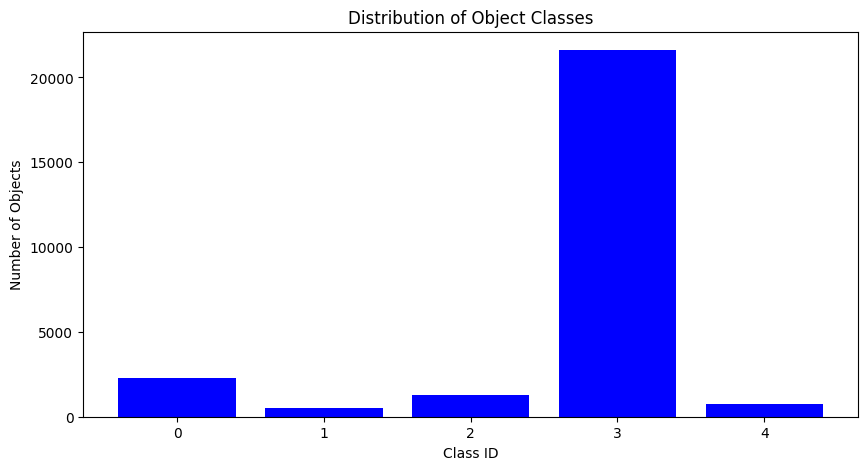

In [2]:
import os
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

# Set the path to the dataset directory
dataset_directory = "C:/Users/user/Downloads/projects/MBGprocess/"

# Set the paths for image and label folders
image_folder = os.path.join(dataset_directory, "imageframes")
label_folder = os.path.join(dataset_directory, "labelframes")

# Get lists of image and label files
image_files = os.listdir(image_folder)
label_files = os.listdir(label_folder)

# Ensure the lists are sorted for consistency
image_files.sort()
label_files.sort()

# Split the data into training, validation, and test sets
image_train, image_temp, label_train, label_temp = train_test_split(image_files, label_files, test_size=0.4, random_state=1)
image_val, image_test, label_val, label_test = train_test_split(image_temp, label_temp, test_size=0.5, random_state=1)

# First split to get 20% as test set
image_train, image_test, label_train, label_test = train_test_split(image_files, label_files, test_size=0.2, random_state=1)
# Split the training set again to get the validation set (requires calculation to get the needed percentage)
image_train, image_val, label_train, label_val = train_test_split(image_train, label_train, test_size=0.25, random_state=1)

# Display the lengths of the sets
print("Train set size (60%):", len(image_train))
print("Validation set size (20%):", len(image_val))
print("Test set size (20%):", len(image_test))

# Now you have variables containing the file paths for each set
train_set = list(zip(image_train, label_train))
val_set = list(zip(image_val, label_val))
test_set = list(zip(image_test, label_test))

# Visualize the distribution of object classes
def visualize_class_distribution(labels):
    class_counts = {}
    for label_file in labels:
        with open(os.path.join(label_folder, label_file), 'r') as f:
            lines = f.readlines()
            for line in lines:
                class_id = line.split()[0]
                if class_id not in class_counts:
                    class_counts[class_id] = 1
                else:
                    class_counts[class_id] += 1

    class_ids = sorted(list(map(int, class_counts.keys())))
    counts = [class_counts[str(class_id)] for class_id in class_ids]

    plt.figure(figsize=(10, 5))
    plt.bar(class_ids, counts, color='blue')
    plt.xlabel('Class ID')
    plt.ylabel('Number of Objects')
    plt.title('Distribution of Object Classes')
    plt.show()

# Visualize class distribution for training set
visualize_class_distribution(label_train)


#     class_ids = {"tire": 0, "bottle": 1, "bucket": 2, "watertank": 3, "pool": 4, "puddle": 5}


In [6]:
# Oversampling to balance the classes
from collections import Counter

# Count the occurrences of each class in the original training set
class_counts_original = Counter([line.split()[0] for label_file in label_train for line in open(os.path.join(label_folder, label_file))])

# Find the class with the maximum count
max_class_count = max(class_counts_original.values())

# Oversample the minority classes to match the count of the majority class
for class_id, count in class_counts_original.items():
    if count < max_class_count:
        # Calculate the number of samples needed to balance the class
        oversample_count = max_class_count - count

        # Get the file paths for the images and labels of the current class
        class_samples = [(img, label) for img, label in zip(image_train, label_train) if class_id in open(os.path.join(label_folder, label)).readline().split()]

        # Oversample by duplicating samples
        oversampled_samples = class_samples * (oversample_count // len(class_samples))
        
        # Append the oversampled samples to the training set
        image_train.extend([sample[0] for sample in oversampled_samples])
        label_train.extend([sample[1] for sample in oversampled_samples])

# Display the lengths of the sets after oversampling
print("Oversampled Train set size (Balanced):", len(image_train))
# Visualize class distribution for the balanced training set
visualize_class_distribution(label_train)


Oversampled Train set size (Balanced): 460126


In [ ]:
# !git clone https://github.com/ultralytics/yolov5.git

In [ ]:
# !pip install -r requirements.txt

In [ ]:
import torch
from IPython.display import Image

In [ ]:
%cd yolov5

c:\Users\user\Downloads\projects\AutoYOLOv5\yolov5


c:\Users\user\Downloads\projects\AutoYOLOv5\myenv\Lib\site-packages\IPython\core\magics\osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [ ]:
# !pip install -r requirements.txt comet_ml

## Split dataset into train and val folders

## Directing splitted images into their belonged folders

In [ ]:
#test test

## Train

In [ ]:
# Train YOLOv5s on MBG dataset
!python train.py --img 512 --batch 32 --epochs 30 --data mbg_test.yaml --weights yolov5s.pt --cache

^C


## Detect Images

In [ ]:
!python detect.py --source runs/train/exp/test1.jpg --weights best.pt

C:\Program Files\Python311\python.exe: can't open file 'c:\\Users\\user\\Downloads\\projects\\AutoYOLOv5\\detect.py': [Errno 2] No such file or directory
